# ***Coffee shop DataFrame analysis.***

1. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install openpyxl

2. Load the DataFrame from the file: Coffee Shop Sales.xlsx

In [ ]:
# Load Excel Dataframe
df_coffee = pd.read_excel("01.datasets/Coffee Shop Sales.xlsx")
df_coffee.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


3. Display the columns of the DataFrame

In [ ]:
df_coffee.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

4. Display the DataFrame information

In [ ]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149100 non-null  datetime64[ns]
 2   transaction_time  149101 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149100 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149115 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149097 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


# Interpretation:

This DataFrame has 149116 records and a total of 11 columns with a range of data type between Integers, Objects, Floats and NaN. The columns are Transaction ID, Transaction Date, Transaction Time, Transaction Quantity, Store ID, Store Location, Product ID, Unit Price, Product Category, Product Type, Product Detail. This DataFrame is an inventory of sales made in which location and for which products.

5. Main statistics of numerical variables

In [ ]:
df_coffee.describe(include='all')

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
count,149116.000000,149100,149101,149116.000000,149116.000000,149100,149116.000000,149116.000000,149115,149116,149097
unique,NaN,NaN,25762,NaN,NaN,3,NaN,NaN,9,29,80
top,NaN,NaN,09:31:15,NaN,NaN,Hell's Kitchen,NaN,NaN,Coffee,Brewed Chai tea,Chocolate Croissant
freq,NaN,NaN,41,NaN,NaN,50730,NaN,NaN,58416,17183,3076
mean,74737.371872,2023-04-15 11:57:05.577465088,NaN,1.438276,5.342063,NaN,47.918607,3.382219,NaN,NaN,NaN
min,1.000000,2023-01-01 00:00:00,NaN,1.000000,3.000000,NaN,1.000000,0.800000,NaN,NaN,NaN
25%,37335.750000,2023-03-06 00:00:00,NaN,1.000000,3.000000,NaN,33.000000,2.500000,NaN,NaN,NaN
50%,74727.500000,2023-04-24 00:00:00,NaN,1.000000,5.000000,NaN,47.000000,3.000000,NaN,NaN,NaN
75%,112094.250000,2023-05-30 00:00:00,NaN,2.000000,8.000000,NaN,60.000000,3.750000,NaN,NaN,NaN
max,149456.000000,2023-06-30 00:00:00,NaN,8.000000,8.000000,NaN,87.000000,45.000000,NaN,NaN,NaN


6. DataFrame dimensions

In [ ]:
dimensiones = df_coffee.shape
print(f"The dataframe dimensions are as follows: {dimensiones[0]} columns and {dimensiones[1]} rows.")
#Columns are represented by cero and rows by one.

The dataframe dimensions are as follows: 149116 columns and 11 rows.


7. Maximum value and name of a product in the DataFrame

In [ ]:
max_price = df_coffee['unit_price'].idxmax()

max_product = df_coffee.loc[max_price, 'product_detail']
max_value = df_coffee.loc[max_price, 'unit_price']

print(f"The maximum value of the dataframe is {max_value} and it's name is '{max_product}'")

The maximum value of the dataframe is 45.0 and it's name is 'Civet Cat'


8. Created a new column called `transaction_price`

In [ ]:
df_coffee['transaction_price'] = df_coffee['transaction_qty'] * df_coffee['unit_price']

# This column represents the price of a transaction, obtained by multiplying
# the unit price of a product by the transaction quantity registered for this sale.

df_coffee.head(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_price
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0


9. Filter the data by `product_category` to find all `coffee` products

In [ ]:
filter = df_coffee[df_coffee['product_category'] == 'Coffee']
print(filter)

        transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
3                    4       2023-01-01         07:20:24                1   
6                    7       2023-01-01         07:25:49                1   
7                    8       2023-01-01         07:33:34                2   
8                    9       2023-01-01         07:39:13                1   
...                ...              ...              ...              ...   
149103          149444       2023-06-30         19:51:59                2   
149104          149445       2023-06-30         19:52:28                2   
149105          149446       2023-06-30         19:53:46                1   
149106          149447       2023-06-30         19:56:45                1   
149114          149455       2023-06-30         20:57:19                1   

        store_id   store_location  product_id  unit_price product_category 

10. Find the most expensive coffee products on the `product_category`

In [ ]:
df = df_coffee[df_coffee['product_category'] == 'Coffee']

df_expensive = df.loc[df['unit_price'].idxmax()]
df_cheapest = df.loc[df['unit_price'].idxmin()]

print(f"The cheapest coffee product is: \n{df_cheapest}")

print(f"\nThe most expensive coffee product is: \n{df_expensive}")

The cheapest coffee product is: 
transaction_id                                 4
transaction_date             2023-01-01 00:00:00
transaction_time                        07:20:24
transaction_qty                                1
store_id                                       5
store_location                   Lower Manhattan
product_id                                    22
unit_price                                   2.0
product_category                          Coffee
product_type                         Drip coffee
product_detail       Our Old Time Diner Blend Sm
transaction_price                            2.0
Name: 3, dtype: object

The most expensive coffee product is: 
transaction_id                         9
transaction_date     2023-01-01 00:00:00
transaction_time                07:39:13
transaction_qty                        1
store_id                               5
store_location           Lower Manhattan
product_id                            39
unit_price                   

11. Nule count value of each column

In [ ]:
df_coffee.isna().sum()

transaction_id        0
transaction_date     16
transaction_time     15
transaction_qty       0
store_id              0
store_location       16
product_id            0
unit_price            0
product_category      1
product_type          0
product_detail       19
transaction_price     0
dtype: int64

12. Percentage of null count value of each column

In [ ]:
null_porcentaje = (df_coffee.isnull().sum()/len(df_coffee)*100).sort_values(ascending = False)
null = null_porcentaje.round(3)
print(null)

product_detail       0.013
transaction_date     0.011
store_location       0.011
transaction_time     0.010
product_category     0.001
transaction_id       0.000
transaction_qty      0.000
store_id             0.000
unit_price           0.000
product_id           0.000
product_type         0.000
transaction_price    0.000
dtype: float64


13. Null treatment of the DataFrame

In [ ]:
df_coffee['transaction_date'] = df_coffee['transaction_date'].fillna(0)
df_coffee['transaction_time'] = df_coffee['transaction_time'].fillna(0)
df_coffee['store_location'] = df_coffee['store_location'].fillna(0)
df_coffee['product_category'] = df_coffee['product_category'].fillna(0)
df_coffee['product_detail'] = df_coffee['product_detail'].fillna(0)

df_coffee.isnull().sum()

# The fillna() method in Pandas is used to fill missing (or "NaN") values in a DataFrame or Series with a specified value.
# In this case, I choose to fill all the NaNs with zero, because it's useful when missing values represent "nothing" or "absence" (e.g. zero sales).
# It also ensures that calculations (such as sums) aren't distorted by missing data.

transaction_id       0
transaction_date     0
transaction_time     0
transaction_qty      0
store_id             0
store_location       0
product_id           0
unit_price           0
product_category     0
product_type         0
product_detail       0
transaction_price    0
dtype: int64

14. Checking column data before running a bivariate analysis

In [ ]:
df_coffee['product_category'].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 0, 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [ ]:
df_coffee['transaction_qty'].unique()

array([2, 1, 3, 4, 8, 6])

15. Bivariate analysis for two data sets

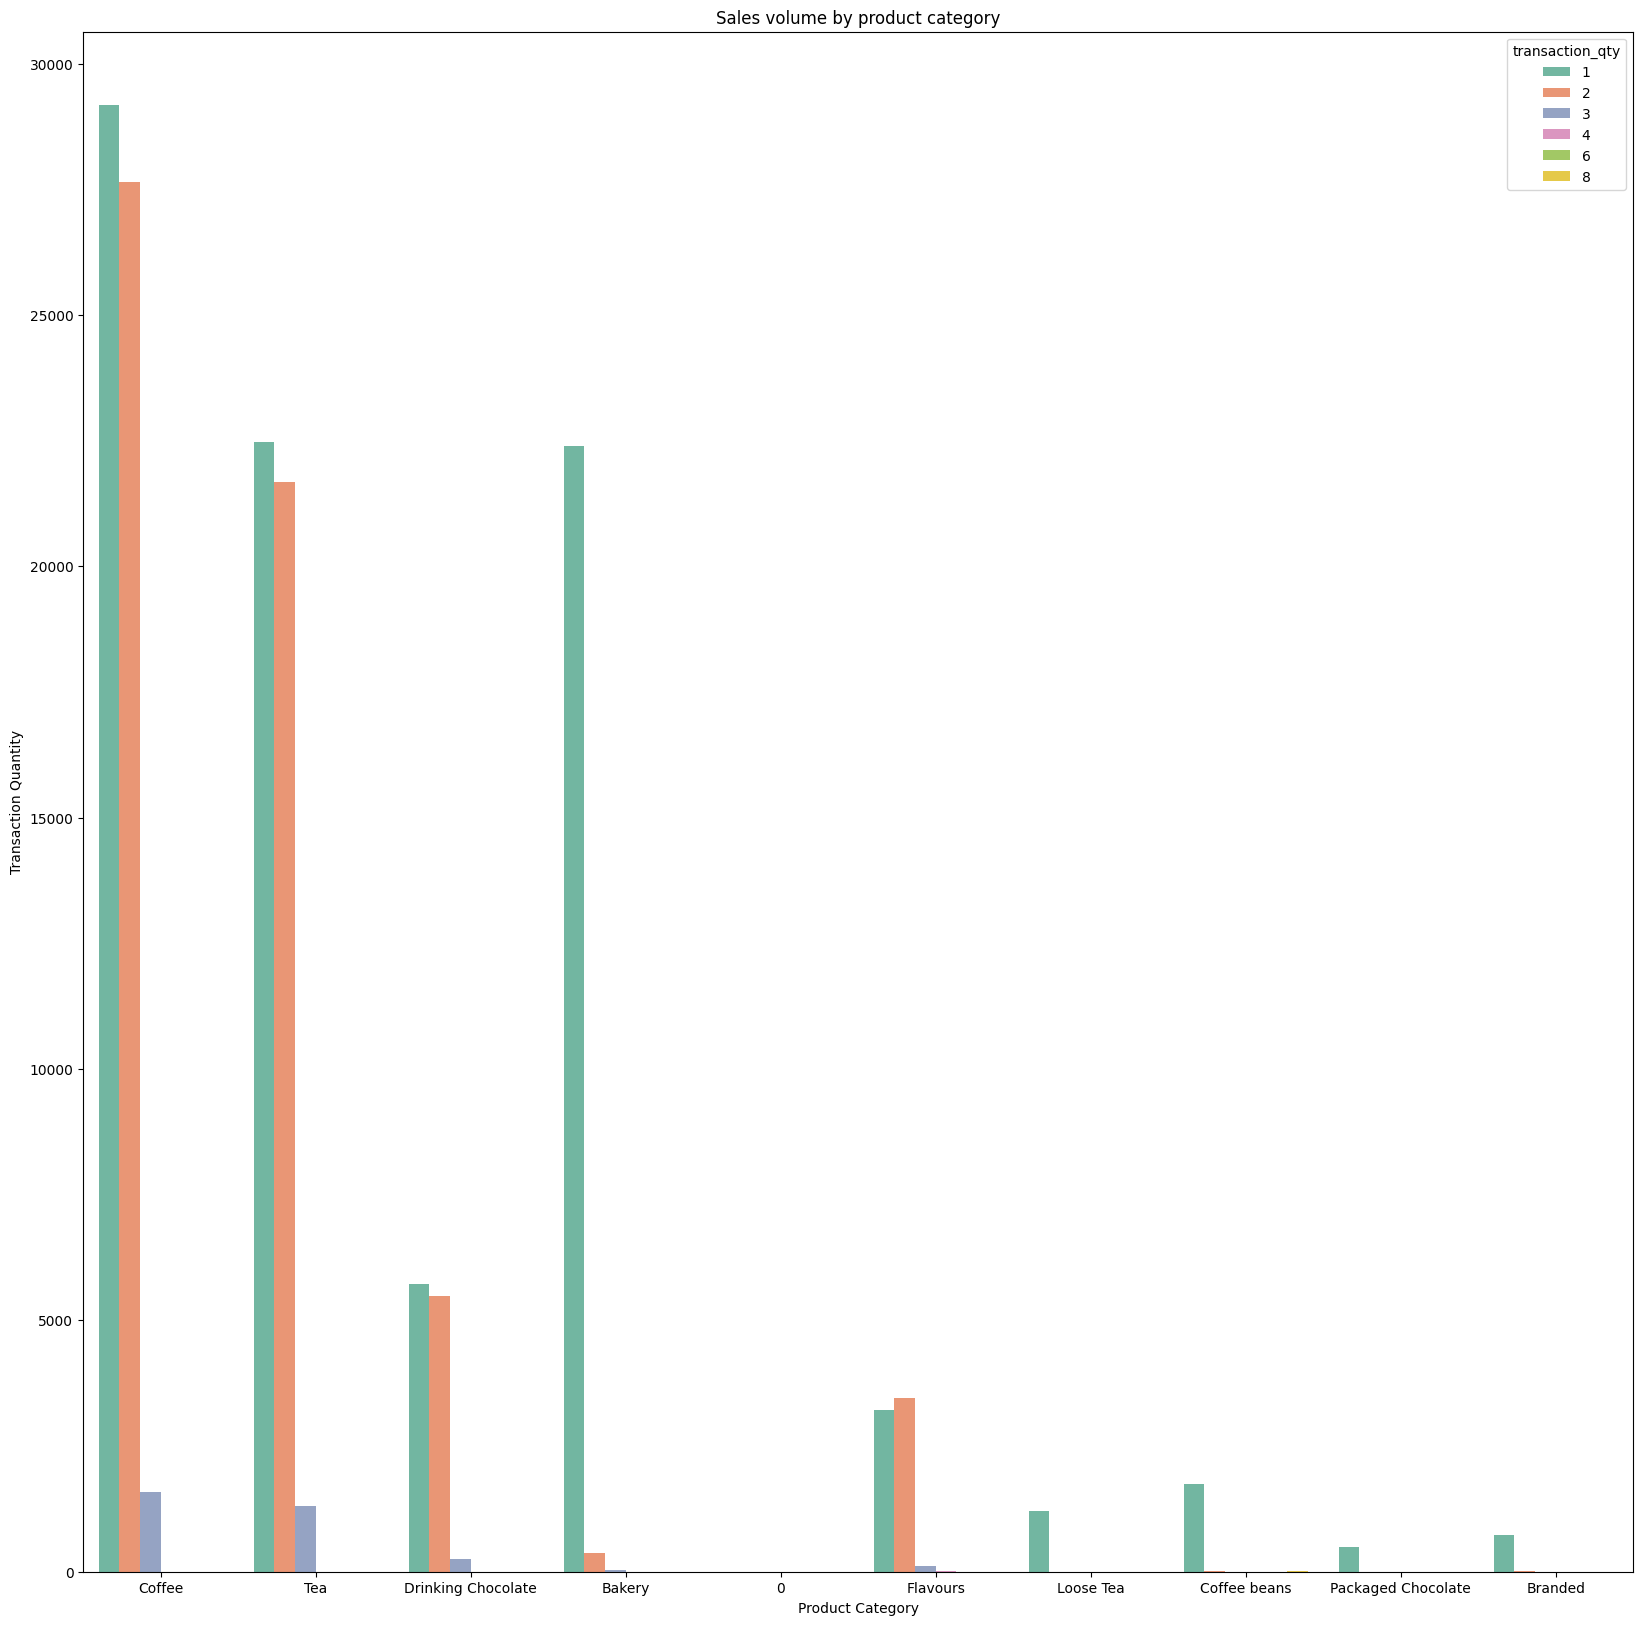

In [ ]:
plt.figure(figsize=(20, 20))
sns.countplot(data=df_coffee, x='product_category', hue='transaction_qty', palette='Set2')
plt.title('Sales volume by product category')
plt.xlabel('Product Category')
plt.ylabel('Transaction Quantity')
plt.show()

# Explanation #1:

Question: Which product is the best seller in this café?

From this bar chart we can see that the public have a preference for coffee, tea and bakery, and they usually buy these products in one or two units, with the possibility of buying more than 1 or 2 units of these products less likely. There is a marked preference for coffee, usually bought in one or two units, followed by tea, drinking chocolate is more in a pair, people usually buy these in one or two and less likely three units and bakery is usually bought in one unit, the flavourings product category is also in a pair with 1 or 2 units usually sold and finally loose tea, coffee beans, packaged coffee and branded are usually bought in one unit. Needless to say, people in this coffee shop have a preference for the three products mentioned above (coffee, tea and bakery), with coffee being the first.

There is information for coffee beans bought 8 times, which is atypical.

16. Checking column data before running another bivariate analysis

In [ ]:
df_coffee.dtypes

transaction_id         int64
transaction_date      object
transaction_time      object
transaction_qty        int64
store_id               int64
store_location        object
product_id             int64
unit_price           float64
product_category      object
product_type          object
product_detail        object
transaction_price    float64
dtype: object

In [ ]:
df_coffee['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria', 0], dtype=object)

In [ ]:
df_coffee['store_id'].unique()

array([5, 8, 3])

In [ ]:
df_coffee[['store_location','store_id']]

# Hell's kitchen (8), Lower Manhattan (5), Astoria(3)

,store_location,store_id
0,Lower Manhattan,5
1,Lower Manhattan,5
2,Lower Manhattan,5
3,Lower Manhattan,5
4,Lower Manhattan,5
...,...,...
149111,Hell's Kitchen,8
149112,Hell's Kitchen,8
149113,Hell's Kitchen,8
149114,Hell's Kitchen,8


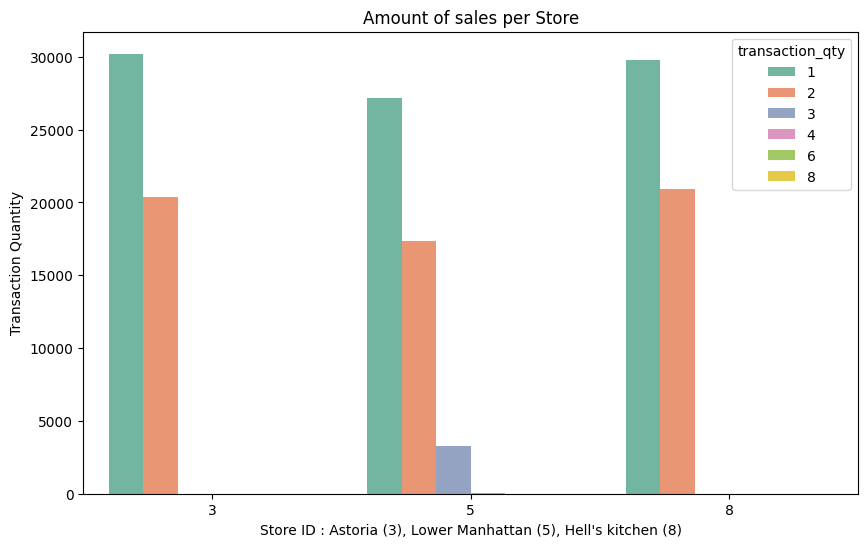

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_coffee, x='store_id', hue='transaction_qty', palette='Set2')
plt.title('Amount of sales per Store')
plt.xlabel("Store ID : Astoria (3), Lower Manhattan (5), Hell's kitchen (8)")
plt.ylabel('Transaction Quantity')
plt.show()

## Explanation #2:

Question: Related to the above bivariate analysis, which store is more successful?

The above graph shows that the more successful store is Astoria, but the sales are usually of one product each, followed by Hell's Kitchen with a similar distribution to Astoria and Hell's Kitchen being the last with a more even distribution between 1, 2 and 3 units per sale. A quick analysis positions Astoria as the most successful store.

17. Atipic values in a DataSet

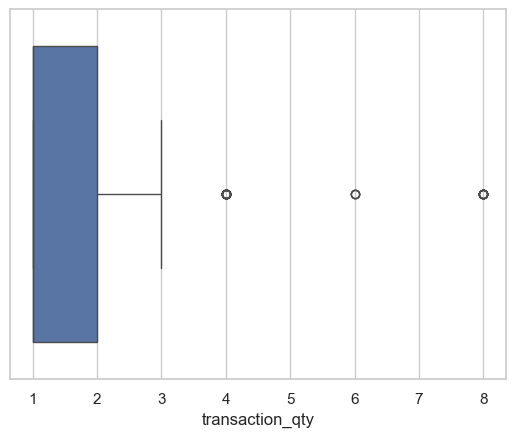

In [ ]:
sns.boxplot(x=df_coffee['transaction_qty'])
plt.show()

In [ ]:
Q1 = df_coffee['transaction_qty'].quantile(0.25)
Q3 = df_coffee['transaction_qty'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_coffee['Outlier'] = (df_coffee['transaction_qty'] < lower_bound) | (df_coffee['transaction_qty'] > upper_bound)
print(df_coffee) #Generar nuevo gráfico

        transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
1                    2       2023-01-01         07:08:56                2   
2                    3       2023-01-01         07:14:04                2   
3                    4       2023-01-01         07:20:24                1   
4                    5       2023-01-01         07:22:41                2   
...                ...              ...              ...              ...   
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id   store_location  product_id  unit_price    product_catego

18. Treatment of an atypical value of the dataset

In [ ]:
# Logaritmic transformation of the data with Numphy
df_coffee['transactionQTY_log'] = np.log(df_coffee['transaction_qty'])
print(df_coffee)


        transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
1                    2       2023-01-01         07:08:56                2   
2                    3       2023-01-01         07:14:04                2   
3                    4       2023-01-01         07:20:24                1   
4                    5       2023-01-01         07:22:41                2   
...                ...              ...              ...              ...   
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id   store_location  product_id  unit_price    product_catego